In [33]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [74]:
def normalize(minimum, maximum, value):
    norm_value = (value - minimum) / (maximum - minimum)
    return norm_value

In [73]:
def rgb(minimum, maximum, value):
    minimum, maximum = float(minimum), float(maximum)
    ratio = 2 * (value-minimum) / (maximum - minimum)
    
    b = int(max(0, 255*(1 - ratio)))
    b = normalize(0, 255, b)
    
    r = int(max(0, 255*(ratio - 1)))
    r = normalize(0, 255, r)
    
    g = 255 - b - r
    g = normalize(0, 255, g)
    
    return r, g, b

In [124]:
xxx = rgb(dmin, dmax, 0.2)
xxx

(0.0, 0.9968781237985391, 0.796078431372549)

### plt.scatter(0, 0, s=200, color=xxx);

In [76]:
filename = 'envir_hist.h5'

In [36]:
with h5py.File(filename, 'r') as f:
    a_group_key = list(f.keys())[0]
    
    # Get the data
    data = list(f[a_group_key])

In [45]:
dmin = np.min(data)
dmax = np.max(data)

In [66]:
dmin, dmax

(0.0, 1.992186)

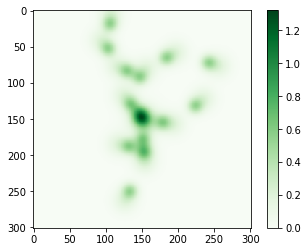

In [44]:
plt.imshow(data[100], cmap="Greens")
plt.colorbar()

In [21]:
# Save x and y
x = data[100][::,0]
y = data[100][::,1]

c = np.savetxt('array.txt', (x, y))  

In [26]:
np.savetxt("array.txt", data[100], fmt="%s")

In [17]:
data[100].shape

(301, 301)

In [29]:
data[100][100][100]

0.011949617

# Save maps as txt for C

In [135]:
with h5py.File(filename, 'r') as f:
    a_group_key = list(f.keys())[0]
    
    # Get the data
    data = list(f[a_group_key])

In [137]:
time = len(data)
stepsize = 1
for t in range(2560, time):
    if t % stepsize == 0:
        np.savetxt(f"timestep_{t}.txt", data[t], fmt="%s")

In [134]:
time = 10
stepsize = 1
for t in range(time):
#     if t % 1000 == 0:
    np.savetxt(f"timestep_{t}.txt", data[t], fmt="%s")

# Preprocess position data

In [143]:
filename_2 = 'bee_hist.h5'

In [144]:
bee_data = {}
with h5py.File(filename_2, 'r') as infile:
    for key, val in infile.items():
        bee_data[key] = np.array(val)

In [ ]:
# Each time step, have a list of bee positions
# Separate list of scenting: each time step, have positions of bees that should flap wings

In [151]:
bee_nums = np.unique(bee_data['bee_i'])
bees = {}
for bee_num in bee_nums:
    idxs = np.where(bee_data['bee_i']==bee_num)
    bee_state = bee_data['state'][idxs]
    bee_x = bee_data['x'][idxs]
    bee_y = bee_data['y'][idxs]
    bias = bee_data['wx'][idxs], bee_data['wy'][idxs]
    bees[bee_num] = {'x': bee_x, 'y': bee_y, 'bias': bias, 'state': bee_state}

In [156]:
bees[0]['state']

array([0, 0, 0, ..., 1, 1, 1])